# Predicting medical insurance cost using machine learning

This notebook looks into various Python-based libraries of machine learning and data science in an attempt to build a machine learning model capable of predicting medical insurance costs.

** Kaggle Version ** : https://www.kaggle.com/datasets/mirichoi0218/insurance

## 1.Problem Definition

> Given certain features can we predict medical insurance charges of a person?

## 2.Features



* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

## 3.Preparing the tools
We are goin to use pandas,matplotlib,seaborn,numpy and pycaret for data manipulation, visualaization and to choose the right machine learning model.

In [1]:
# Importing all the tools we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Pycaret

from pycaret.regression import *

### Importing the dataset

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Cleaning

In [50]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Some information about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


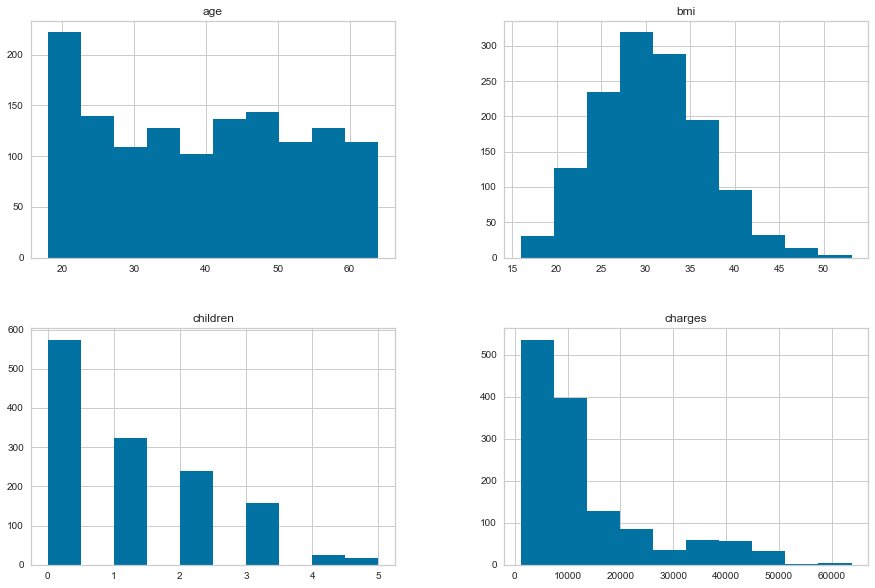

In [49]:
df.hist(figsize=(15, 10));

### Correlation matrix

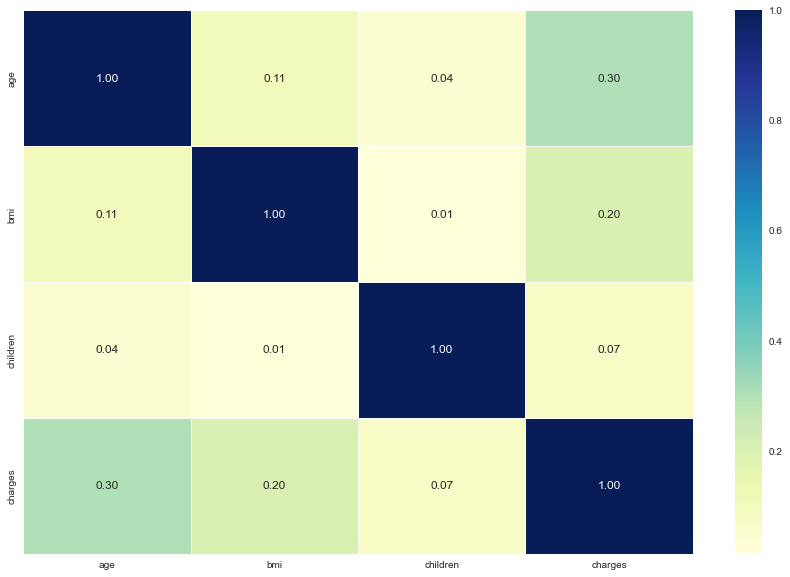

In [6]:
corr_matrix = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");

### Data Preprocessing

In [7]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique())<=9:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [8]:
categorical_val

['sex', 'children', 'smoker', 'region']

In [9]:
dataset = pd.get_dummies(df, columns = categorical_val)
dataset.head()

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,18,33.770,1725.55230,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,28,33.000,4449.46200,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,33,22.705,21984.47061,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4,32,28.880,3866.85520,0,1,1,0,0,0,0,0,1,0,0,1,0,0


In [10]:
dataset.columns

Index(['age', 'bmi', 'charges', 'sex_female', 'sex_male', 'children_0',
       'children_1', 'children_2', 'children_3', 'children_4', 'children_5',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

### Modelling 

In [11]:
expriment  = setup(dataset,target = 'charges',remove_outliers=True,train_size = 0.9)

,Description,Value
0,session_id,7957
1,Target,charges
2,Original Data,"(1338, 17)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1143, 14)"


In [12]:
np.random.seed(4)
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2609.2850,22345605.2858,4689.3969,0.8439,0.4406,0.3067,0.0170
lightgbm,Light Gradient Boosting Machine,2890.6651,24446061.2272,4907.5795,0.8290,0.5552,0.3763,0.0120
rf,Random Forest Regressor,2764.9160,25044315.2156,4965.2303,0.8255,0.4867,0.3431,0.0630
ada,AdaBoost Regressor,4107.7634,27339880.7416,5202.2093,0.8091,0.6144,0.6942,0.0070
et,Extra Trees Regressor,2888.8737,29751271.4118,5417.8435,0.7928,0.5110,0.3500,0.0520
ridge,Ridge Regression,4191.4498,37805123.4000,6138.3434,0.7371,0.5689,0.4203,0.0060
llar,Lasso Least Angle Regression,4176.1956,37814496.3029,6139.0522,0.7371,0.5942,0.4179,0.0050
br,Bayesian Ridge,4187.4711,37805131.4304,6138.3326,0.7371,0.5703,0.4196,0.0050
lasso,Lasso Regression,4180.1292,37804930.0000,6138.2851,0.7371,0.5744,0.4184,0.2640
lr,Linear Regression,4179.8256,37804744.0000,6138.2674,0.7371,0.5750,0.4183,0.5810


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7957, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#### From this table we can see that Gradient Boost Regressor gives the best score so we will try to proceed to tune this model to give better results

In [13]:
gbr = create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2611.2721,24204138.5738,4919.7702,0.8209,0.4499,0.3575
1,2459.0303,21858593.5388,4675.3175,0.8452,0.3936,0.2568
2,2229.8347,14739149.3695,3839.1600,0.8826,0.4118,0.3369
3,2512.0554,21835211.1576,4672.8162,0.8639,0.3914,0.2761
4,2833.4156,25883898.6707,5087.6221,0.8137,0.5416,0.3784
5,2694.7740,24323591.4161,4931.8953,0.8552,0.4171,0.2460
6,2192.8488,13117488.0607,3621.8073,0.9105,0.4159,0.3228
7,2322.6485,18229394.2929,4269.5895,0.8885,0.3797,0.2427
8,2880.3514,26957197.2281,5192.0321,0.7988,0.5110,0.2870


### Hyperparameter tuning

In [14]:
tuned_gbr = tune_model(gbr,n_iter=500)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2681.1454,23636056.9450,4861.6928,0.8251,0.4701,0.4113
1,2456.3647,21099783.9236,4593.4501,0.8505,0.4216,0.3207
2,2318.6726,13509745.7452,3675.5606,0.8924,0.4551,0.4171
3,2519.4341,21140535.6796,4597.8838,0.8682,0.4131,0.3195
4,2899.2401,24662924.0123,4966.1780,0.8225,0.5192,0.4267
5,2562.5744,21758182.9814,4664.5668,0.8705,0.4307,0.2901
6,2332.4216,12712840.1354,3565.5070,0.9133,0.4521,0.4090
7,2557.3703,19123666.8566,4373.0615,0.8831,0.4223,0.3224
8,2811.8826,23691644.7906,4867.4064,0.8232,0.4587,0.3282


In [15]:
tuned_gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.002,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 7957,
 'subsample': 0.35,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [16]:
predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2170.9053,13457287.6302,3668.4176,0.8786,0.3881,0.3099


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,30.0,37.430000,0,0,0,0,1,0,0,1,1,0,0,0,5428.727539,6512.718180
1,51.0,25.400000,0,1,0,0,0,0,0,1,0,0,0,1,8782.468750,11155.277744
2,27.0,17.955000,1,0,0,1,0,0,0,0,1,0,0,0,15006.579102,16558.431099
3,27.0,33.154999,0,0,0,1,0,0,0,1,0,1,0,0,4058.712402,7066.107466
4,54.0,21.469999,1,0,0,0,1,0,0,1,0,1,0,0,12475.351562,13324.200566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,48.0,27.264999,1,0,1,0,0,0,0,1,1,0,0,0,9447.250000,11577.656919
130,18.0,31.129999,1,1,0,0,0,0,0,1,0,0,1,0,1621.882690,3643.262238
131,51.0,33.915001,1,1,0,0,0,0,0,1,1,0,0,0,9866.304688,11197.872382
132,63.0,21.660000,1,1,0,0,0,0,0,1,1,0,0,0,14449.854492,14225.475851


#### Checking different methods of tuning

In [17]:
tuned_gbr2 = tune_model(gbr,n_iter=500,search_library='optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2522.0012,23117665.7032,4808.0834,0.8289,0.4391,0.3520
1,2376.3849,21115292.3066,4595.1379,0.8504,0.3931,0.2722
2,2093.4687,12731650.7299,3568.1439,0.8986,0.3930,0.3275
3,2425.6270,21057309.9643,4588.8245,0.8687,0.3882,0.2782
4,2767.6607,24373243.9763,4936.9266,0.8246,0.5076,0.3720
5,2559.3867,22214981.8409,4713.2772,0.8678,0.4115,0.2515
6,2170.0076,12186250.4476,3490.8810,0.9169,0.4134,0.3452
7,2360.3792,18150900.0287,4260.3873,0.8890,0.4015,0.2781
8,2811.0245,25486023.8266,5048.3684,0.8098,0.4725,0.2878


In [19]:
tuned_gbr3 = tune_model(gbr,n_iter=100,search_library='scikit-optimize')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2447.1663,22451774.2635,4738.3303,0.8339,0.4308,0.3403
1,2478.9758,22710996.7492,4765.6056,0.8391,0.4213,0.2864
2,2102.8401,12689192.2914,3562.1893,0.8989,0.3749,0.3104
3,2475.2564,20843167.7902,4565.4318,0.8700,0.3886,0.2801
4,2816.9932,25305094.0151,5030.4169,0.8179,0.5210,0.3718
5,2484.7951,22286233.3885,4720.8297,0.8674,0.4126,0.2489
6,2100.9197,11646702.7289,3412.7266,0.9205,0.4070,0.3328
7,2452.8940,18315903.9749,4279.7084,0.8880,0.4006,0.2839
8,2804.6596,24757785.8885,4975.7196,0.8152,0.4895,0.2887


In [24]:
tuned_gbr6 = tune_model(gbr,n_iter=500,choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2681.1454,23636056.9450,4861.6928,0.8251,0.4701,0.4113
1,2456.3647,21099783.9236,4593.4501,0.8505,0.4216,0.3207
2,2318.6726,13509745.7452,3675.5606,0.8924,0.4551,0.4171
3,2519.4341,21140535.6796,4597.8838,0.8682,0.4131,0.3195
4,2899.2401,24662924.0123,4966.1780,0.8225,0.5192,0.4267
5,2562.5744,21758182.9814,4664.5668,0.8705,0.4307,0.2901
6,2332.4216,12712840.1354,3565.5070,0.9133,0.4521,0.4090
7,2557.3703,19123666.8566,4373.0615,0.8831,0.4223,0.3224
8,2811.8826,23691644.7906,4867.4064,0.8232,0.4587,0.3282


In [25]:
bagged = ensemble_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2635.9883,23958600.5894,4894.7524,0.8227,0.4443,0.3583
1,2626.0010,23230510.1205,4819.8040,0.8354,0.4044,0.2770
2,2171.8209,13924246.9601,3731.5207,0.8891,0.3999,0.3246
3,2510.7651,21932162.3140,4683.1787,0.8633,0.3892,0.2729
4,2834.3632,25764681.4267,5075.8922,0.8145,0.5396,0.3813
5,2531.0128,22923450.9998,4787.8441,0.8636,0.4047,0.2362
6,2177.5396,12625353.6376,3553.2174,0.9139,0.4113,0.3231
7,2458.1770,18809808.4731,4337.0276,0.8850,0.4014,0.2756
8,2911.6393,25641804.8270,5063.7738,0.8086,0.4944,0.2902


In [26]:
bagged1 = ensemble_model(gbr,method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4594.0991,35935103.0833,5994.5895,0.7341,0.6961,0.8530
1,3980.7393,29464313.5960,5428.1041,0.7913,0.5663,0.5724
2,4094.2042,25148644.9616,5014.8425,0.7996,0.7072,0.8890
3,4003.4509,26667370.8886,5164.0460,0.8337,0.5477,0.5928
4,4670.0768,37093659.9919,6090.4565,0.7330,0.7225,0.8310
5,4175.3965,28293794.3169,5319.1911,0.8316,0.5548,0.5779
6,3935.5614,23835944.4630,4882.2069,0.8374,0.6449,0.7573
7,3791.2617,23775843.2173,4876.0479,0.8546,0.5463,0.5758
8,4348.3919,34294798.2938,5856.1761,0.7441,0.6187,0.5699


In [27]:
bagged2 = ensemble_model(gbr,method='Boosting',n_estimators=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5906.9227,44197627.0172,6648.1296,0.6729,0.8118,1.1570
1,4223.7270,30868632.7356,5555.9547,0.7813,0.5819,0.6200
2,4227.7760,26347109.0160,5132.9435,0.7901,0.7195,0.9197
3,5508.2521,38811509.7046,6229.8884,0.7580,0.6680,0.8423
4,5878.8232,43840230.8324,6621.1956,0.6844,0.8108,1.1382
5,5473.9441,36575203.2138,6047.7436,0.7823,0.6647,0.8266
6,5446.1061,36601425.5895,6049.9112,0.7503,0.7472,1.0163
7,5465.8957,36301859.4848,6025.1024,0.7781,0.7021,0.9186
8,5816.8400,45938243.8408,6777.7757,0.6572,0.6982,0.8605


In [28]:
bagged3 = ensemble_model(gbr,choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2635.9883,23958600.5894,4894.7524,0.8227,0.4443,0.3583
1,2626.0010,23230510.1205,4819.8040,0.8354,0.4044,0.2770
2,2171.8209,13924246.9601,3731.5207,0.8891,0.3999,0.3246
3,2510.7651,21932162.3140,4683.1787,0.8633,0.3892,0.2729
4,2834.3632,25764681.4267,5075.8922,0.8145,0.5396,0.3813
5,2531.0128,22923450.9998,4787.8441,0.8636,0.4047,0.2362
6,2177.5396,12625353.6376,3553.2174,0.9139,0.4113,0.3231
7,2458.1770,18809808.4731,4337.0276,0.8850,0.4014,0.2756
8,2911.6393,25641804.8270,5063.7738,0.8086,0.4944,0.2902


In [29]:
model1 = create_model('gbr')
model2 = create_model('lightgbm')
model3 = create_model('rf')

blender = blend_models([model1,model2,model3])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2635.3096,25383863.0369,5038.2401,0.8122,0.4696,0.3668
1,2420.6866,22297643.5227,4722.0381,0.8421,0.4266,0.2604
2,2155.4689,14411391.3841,3796.2338,0.8852,0.4183,0.3385
3,2585.7199,22368186.4530,4729.5017,0.8605,0.4026,0.2713
4,2968.6941,28596324.4378,5347.5531,0.7942,0.5902,0.3944
5,2738.0437,24084496.6106,4907.5958,0.8567,0.4644,0.3009
6,2199.6357,13716110.7594,3703.5268,0.9064,0.4437,0.3344
7,2474.8202,18410100.9050,4290.6993,0.8874,0.4038,0.2851
8,2957.5238,27907520.8663,5282.7569,0.7917,0.5319,0.2907


In [30]:
blender1 = blend_models(compare_models(n_select=3))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2635.3096,25383863.0369,5038.2401,0.8122,0.4696,0.3668
1,2420.6866,22297643.5227,4722.0381,0.8421,0.4266,0.2604
2,2155.4689,14411391.3841,3796.2338,0.8852,0.4183,0.3385
3,2585.7199,22368186.4530,4729.5017,0.8605,0.4026,0.2713
4,2968.6941,28596324.4378,5347.5531,0.7942,0.5902,0.3944
5,2738.0437,24084496.6106,4907.5958,0.8567,0.4644,0.3009
6,2199.6357,13716110.7594,3703.5268,0.9064,0.4437,0.3344
7,2474.8202,18410100.9050,4290.6993,0.8874,0.4038,0.2851
8,2957.5238,27907520.8663,5282.7569,0.7917,0.5319,0.2907


In [31]:
blender1 = blend_models(compare_models(n_select=3),choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2635.3096,25383863.0369,5038.2401,0.8122,0.4696,0.3668
1,2420.6866,22297643.5227,4722.0381,0.8421,0.4266,0.2604
2,2155.4689,14411391.3841,3796.2338,0.8852,0.4183,0.3385
3,2585.7199,22368186.4530,4729.5017,0.8605,0.4026,0.2713
4,2968.6941,28596324.4378,5347.5531,0.7942,0.5902,0.3944
5,2738.0437,24084496.6106,4907.5958,0.8567,0.4644,0.3009
6,2199.6357,13716110.7594,3703.5268,0.9064,0.4437,0.3344
7,2474.8202,18410100.9050,4290.6993,0.8874,0.4038,0.2851
8,2957.5238,27907520.8663,5282.7569,0.7917,0.5319,0.2907


In [32]:
stack = stack_models(compare_models(n_select=3),choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2503.4775,23865978.6007,4885.2818,0.8234,0.4358,0.3287
1,2416.9787,22214946.3861,4713.2734,0.8426,0.3946,0.2446
2,2204.1959,14799368.5030,3846.9947,0.8821,0.3931,0.3075
3,2531.7800,21948818.1224,4684.9566,0.8632,0.3906,0.2583
4,2835.9247,26686331.6854,5165.8815,0.8079,0.5577,0.3497
5,2692.9587,24303982.5056,4929.9069,0.8553,0.4439,0.2597
6,2119.9251,12658225.4576,3557.8400,0.9136,0.4054,0.2999
7,2356.7071,18018285.9001,4244.7952,0.8898,0.3692,0.2429
8,2935.3143,27665497.0702,5259.8001,0.7935,0.5472,0.2850


#### From this we can see that the model tuned with "scikit-optimize" gives the best crossvalidated R2 score 

In [34]:
tuned_gbr3.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01962567815254958,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': 0.6752058232840419,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 1e-09,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 7957,
 'subsample': 0.23600598332638095,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [35]:
predict_model(tuned_gbr3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2140.5879,13269017.8138,3642.6663,0.8803,0.3644,0.2685


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,30.0,37.430000,0,0,0,0,1,0,0,1,1,0,0,0,5428.727539,6812.634589
1,51.0,25.400000,0,1,0,0,0,0,0,1,0,0,0,1,8782.468750,11263.092365
2,27.0,17.955000,1,0,0,1,0,0,0,0,1,0,0,0,15006.579102,18387.817609
3,27.0,33.154999,0,0,0,1,0,0,0,1,0,1,0,0,4058.712402,7867.916274
4,54.0,21.469999,1,0,0,0,1,0,0,1,0,1,0,0,12475.351562,14190.422474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,48.0,27.264999,1,0,1,0,0,0,0,1,1,0,0,0,9447.250000,11436.080292
130,18.0,31.129999,1,1,0,0,0,0,0,1,0,0,1,0,1621.882690,3208.549517
131,51.0,33.915001,1,1,0,0,0,0,0,1,1,0,0,0,9866.304688,11317.708325
132,63.0,21.660000,1,1,0,0,0,0,0,1,1,0,0,0,14449.854492,14269.677590


### Visualizations to help understand the model better 

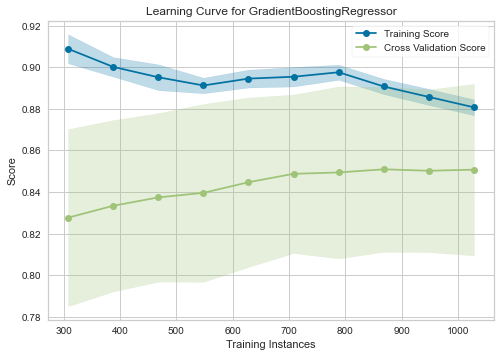

In [37]:
plot_model(tuned_gbr3,plot='learning')

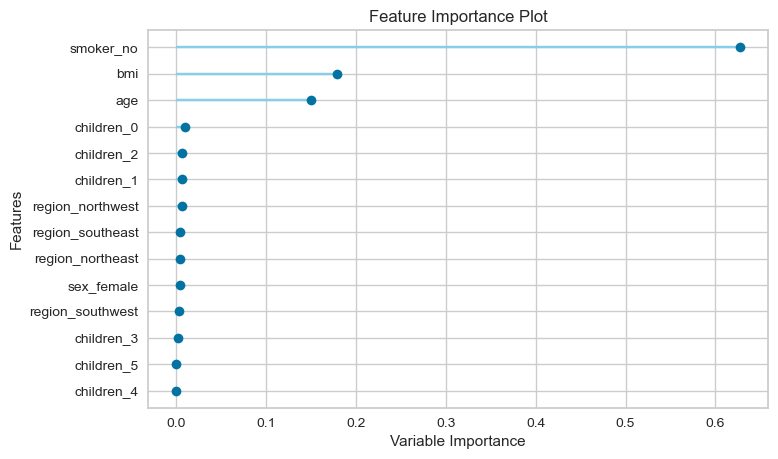

In [38]:
plot_model(tuned_gbr3,"feature_all")

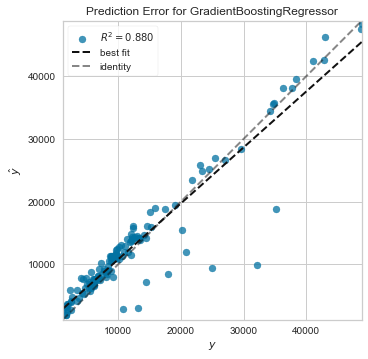

In [43]:
plot_model(tuned_gbr3,"error")

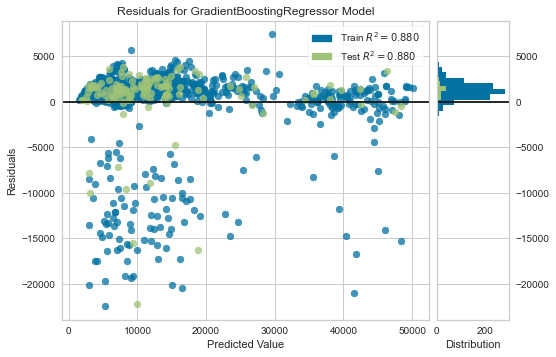

In [45]:
plot_model(tuned_gbr3,'residuals')

In [46]:
evaluate_model(tuned_gbr3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…